## **Golden Task: Choose a dataset with a time component and perform time series analysis**
Select a power consumption dataset that includes a time component and conduct time series analysis, examining patterns, trends, and seasonality over time to gain insights into the temporal dynamics of power consumption for informed decision-making and resource planning. This analysis involves statistical methods and visualization techniques to understand how power usage varies over different time intervals.

Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [3]:
data=pd.read_csv("/content/dataset_tk.csv")
data.rename(columns={"Unnamed: 0":"Date"}, inplace=True)
data['Date']=pd.to_datetime(data["Date"], dayfirst=True)
data["year"]=data["Date"].dt.year
data["month"]=data["Date"].dt.month
data["day"]=data["Date"].dt.day
data.drop(["Date"], axis=1, inplace=True)
data.head(2)

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,year,month,day
0,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,2.1,21.7,2.7,6.1,1.9,2.2,3.4,2019,1,2
1,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,2.2,23.4,2.4,6.5,1.8,2.2,3.6,2019,1,3


In [4]:
long=pd.read_csv("/content/long_data.csv")
long['Dates']=pd.to_datetime(long["Dates"], dayfirst=True)
long["year"]=long["Dates"].dt.year
long["month"]=long["Dates"].dt.month
long["day"]=long["Dates"].dt.day
long.drop(["latitude","longitude","Dates"], axis=1,inplace=True)
long.head(2)

,States,Regions,Usage,year,month,day
0,Punjab,NR,119.9,2019,1,2
1,Haryana,NR,130.3,2019,1,2


## **Yearly Consumption of power among the regions**

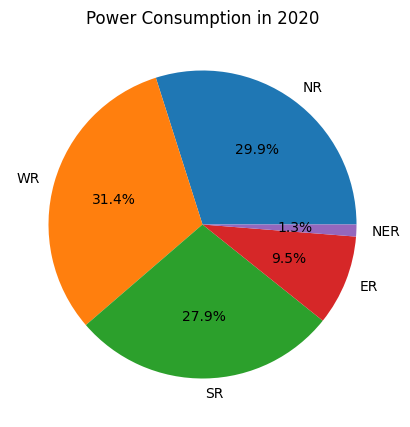

In [5]:
power_consumption_2020 =  dict()
for region in long.Regions.unique():
  data_2020 = long[(long["Regions"]==region) & (long["year"]==2020)]
  total_usage_2020 = data_2020.Usage.sum()
  power_consumption_2020.update({region: total_usage_2020})
plt.figure(figsize=(10,5))
plt.pie(power_consumption_2020.values(), labels = power_consumption_2020.keys(), autopct='%1.1f%%')
plt.title('Power Consumption in 2020')
plt.show()

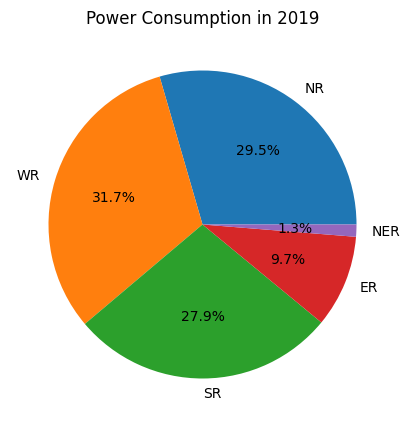

In [6]:
power_consumption_2019 =  dict()
for region in long.Regions.unique():
  data_2019 = long[(long["Regions"]==region) & (long["year"]==2019)]
  total_usage_2019 = data_2019.Usage.sum()
  power_consumption_2019.update({region: total_usage_2019})
plt.figure(figsize=(10,5))
plt.pie(power_consumption_2019.values(), labels = power_consumption_2019.keys(), autopct='%1.1f%%')
plt.title('Power Consumption in 2019')
plt.show()

Both the graphs state that the WR(West Region) has highest power consumption in both the years

## **Yearly Consumption of power by the state**

Text(0.5, 1.0, 'States that consume maximum power in 2020')

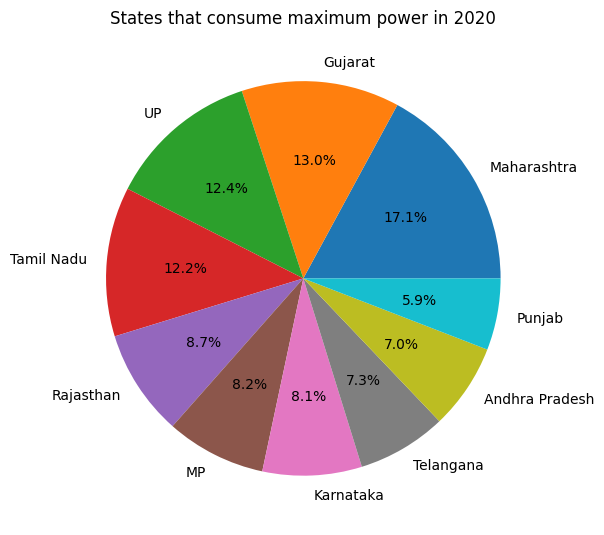

In [7]:
usage_2020 = {}
for state in long['States'].unique():
    usage_data = long[(long['States'] == state) & (long['year'] == 2020)]
    total_usage = usage_data.Usage.sum()
    usage_2020[state] = total_usage
df_2020 = pd.DataFrame.from_dict(usage_2020, orient='index')
df_2020.rename(columns={0: 'Total Usage in 2020'}, inplace=True)
df_2020.sort_values(by=['Total Usage in 2020'], ascending=False, inplace=True)
plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.pie(df_2020['Total Usage in 2020'].head(10), labels=df_2020.index[:10], autopct='%1.1f%%')
plt.title('States that consume maximum power in 2020')

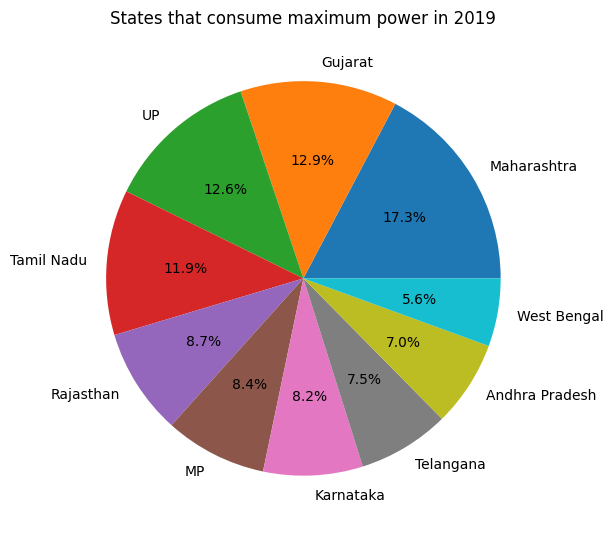

In [8]:
usage_2019 = {}
for state in long['States'].unique():
    usage_data = long[(long['States'] == state) & (long['year'] == 2019)]
    total_usage = usage_data.Usage.sum()
    usage_2019[state] = total_usage

df_2019 = pd.DataFrame.from_dict(usage_2019, orient='index')

df_2019.rename(columns={0: 'Total Usage in 2019'}, inplace=True)

df_2019.sort_values(by=['Total Usage in 2019'], ascending=False, inplace=True)

plt.figure(figsize=(14, 7))
plt.subplot(122)
plt.pie(df_2019['Total Usage in 2019'].head(10), labels=df_2019.index[:10], autopct='%1.1f%%')
plt.title('States that consume maximum power in 2019')
plt.show()

<ipython-input-9-3abd10e138c4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_2020['Total Usage in 2020'], label='2020', shade=True)
<ipython-input-9-3abd10e138c4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_2019['Total Usage in 2019'], label='2019', shade=True)


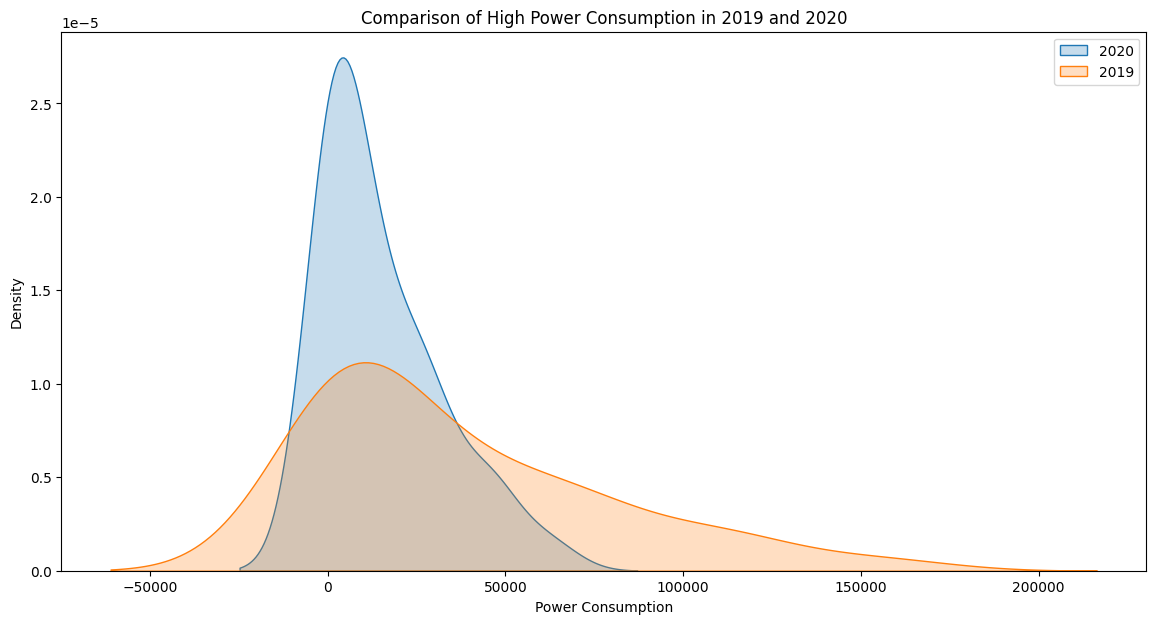

In [9]:
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df_2020['Total Usage in 2020'], label='2020', shade=True)
sns.kdeplot(data=df_2019['Total Usage in 2019'], label='2019', shade=True)
plt.title('Comparison of High Power Consumption in 2019 and 2020')
plt.xlabel('Power Consumption')
plt.ylabel('Density')
plt.legend()
plt.show()

Text(0.5, 1.0, 'States that consume less power in 2020')

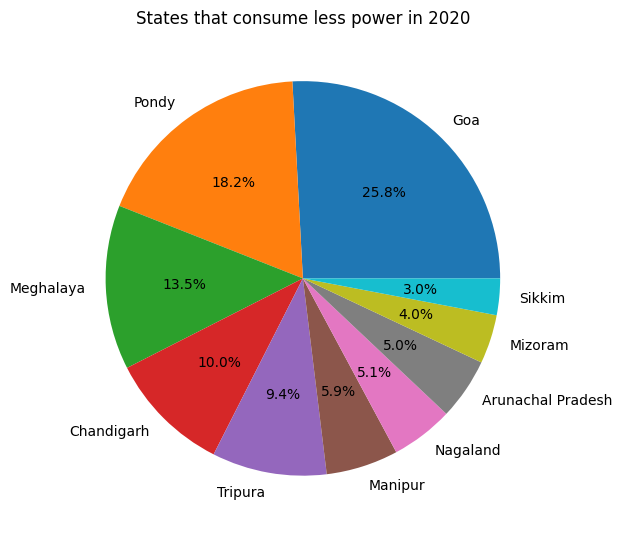

In [10]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.pie(df_2020['Total Usage in 2020'].tail(10), labels=df_2020.index[-10:], autopct='%1.1f%%')
plt.title('States that consume less power in 2020')

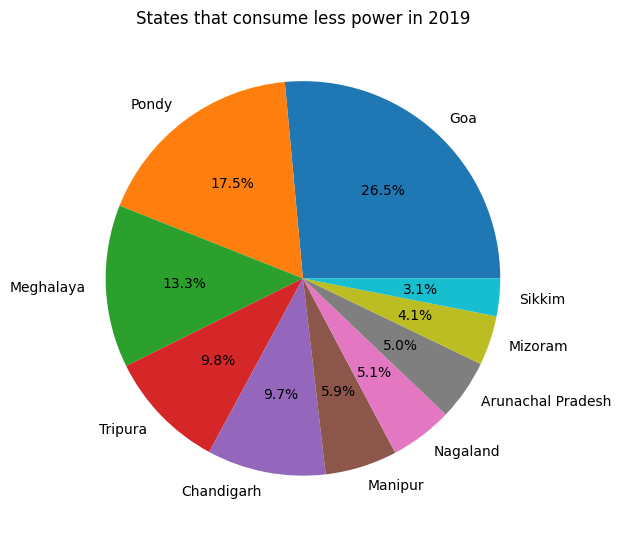

In [11]:
plt.figure(figsize=(14, 7))
plt.subplot(122)
plt.pie(df_2019['Total Usage in 2019'].tail(10), labels=df_2019.index[-10:], autopct='%1.1f%%')
plt.title('States that consume less power in 2019')
plt.show()

<ipython-input-12-45a85fb753ac>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_2020['Total Usage in 2020'], label='2020', shade=True)
<ipython-input-12-45a85fb753ac>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_2019['Total Usage in 2019'], label='2019', shade=True)


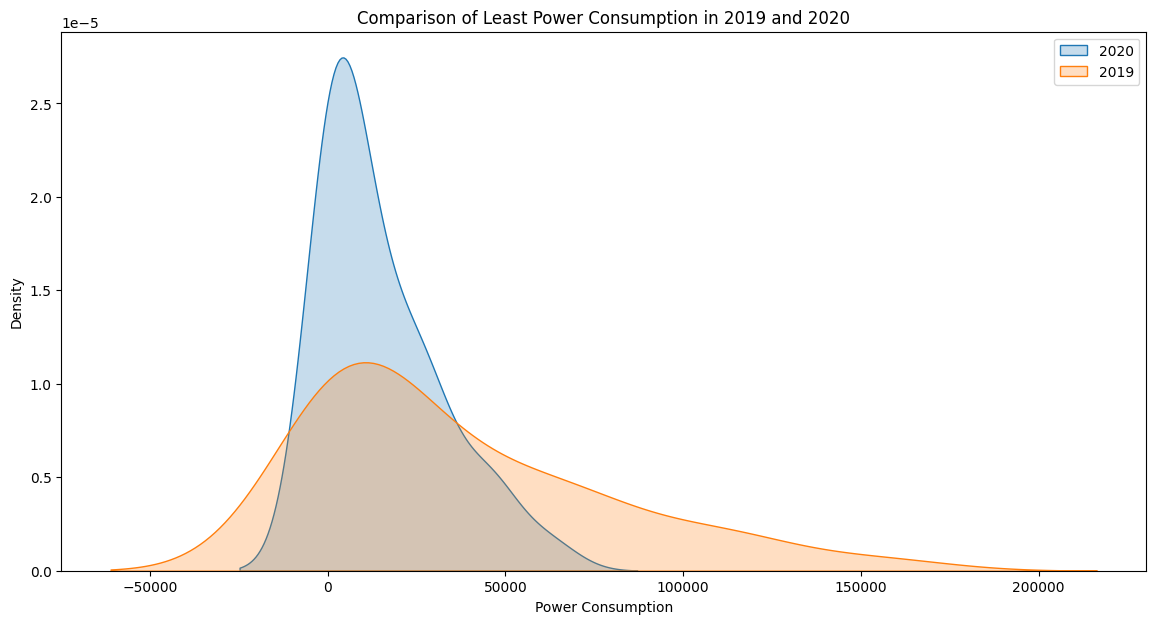

In [12]:
plt.figure(figsize=(14, 7))
sns.kdeplot(data=df_2020['Total Usage in 2020'], label='2020', shade=True)
sns.kdeplot(data=df_2019['Total Usage in 2019'], label='2019', shade=True)
plt.title('Comparison of Least Power Consumption in 2019 and 2020')
plt.xlabel('Power Consumption')
plt.ylabel('Density')
plt.legend()
plt.show()

Both the graphs states that the Highest power is consumed by the state Maharashtra and the Lowest power is consumed by the state Sikkim

## **Maximum Power consumption among the Months**

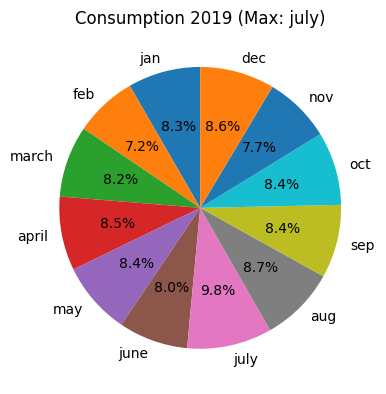

In [13]:
consumption_2019=dict()
for month in range(1,13):
    monthly_data=long[(long["month"]==month)&(long["year"]==2019)]
    total_usage=monthly_data["Usage"].sum()
    consumption_2019.update({month:total_usage})

month_names=["jan","feb",'march',"april","may","june","july","aug","sep","oct","nov","dec"]
usage_2019=list(consumption_2019.values())

max_usage_2019 = max(usage_2019)
max_month_2019 = month_names[usage_2019.index(max_usage_2019)]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(usage_2019, labels = month_names, startangle=90, autopct='%1.1f%%')
plt.title(f'Consumption 2019 (Max: {max_month_2019})')
plt.show()

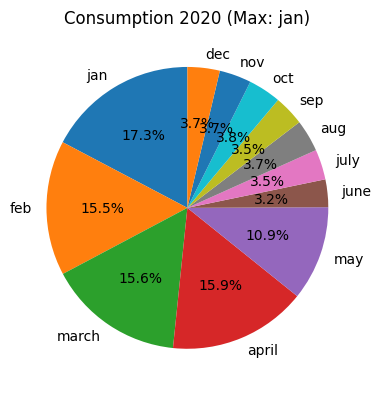

In [14]:
consumption_2020=dict()
for month in range(1,13):
    monthly_data=long[(long["month"]==month)&(long["year"]==2020)]
    total_usage=monthly_data["Usage"].sum()
    consumption_2020.update({month:total_usage})

usage_2020=list(consumption_2020.values())

max_usage_2020 = max(usage_2020)
max_month_2020 = month_names[usage_2020.index(max_usage_2020)]

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.pie(usage_2020, labels = month_names, startangle=90, autopct='%1.1f%%')
plt.title(f'Consumption 2020 (Max: {max_month_2020})')
plt.show()

<ipython-input-15-9087f08c6279>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(usage_2019, label='2019', shade=True)
<ipython-input-15-9087f08c6279>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(usage_2020, label='2020', shade=True)


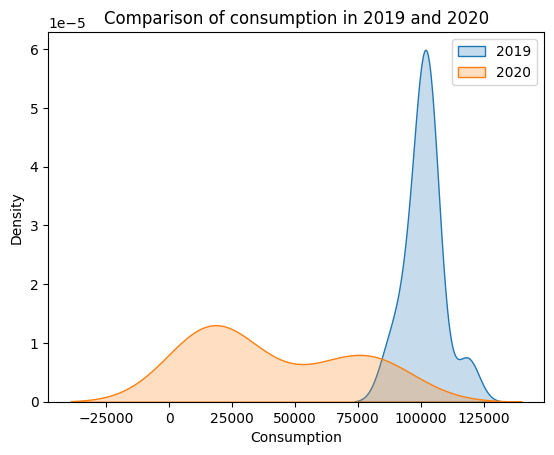

In [15]:
sns.kdeplot(usage_2019, label='2019', shade=True)
sns.kdeplot(usage_2020, label='2020', shade=True)
plt.title('Comparison of consumption in 2019 and 2020')
plt.xlabel('Consumption')
plt.ylabel('Density')
plt.legend()
plt.show()

Both the graphs states that the Maximum power is consumed during July in 2019 and January in 2020

## **Minimum Power consumption among the Months**

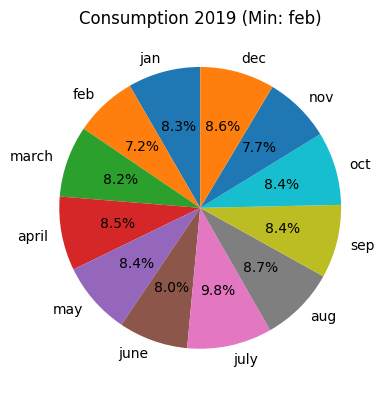

In [16]:
min_usage_2019 = min(usage_2019)
min_month_2019 = month_names[usage_2019.index(min_usage_2019)]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(usage_2019, labels = month_names, startangle=90, autopct='%1.1f%%')
plt.title(f'Consumption 2019 (Min: {min_month_2019})')
plt.show()

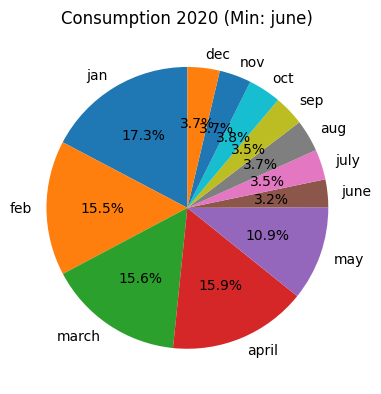

In [17]:
min_usage_2020 = min(usage_2020)
min_month_2020 = month_names[usage_2020.index(min_usage_2020)]
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.pie(usage_2020, labels = month_names, startangle=90, autopct='%1.1f%%')
plt.title(f'Consumption 2020 (Min: {min_month_2020})')
plt.show()

## **Comparison of consumption in 2019 and 2020**

<ipython-input-18-9087f08c6279>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(usage_2019, label='2019', shade=True)
<ipython-input-18-9087f08c6279>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(usage_2020, label='2020', shade=True)


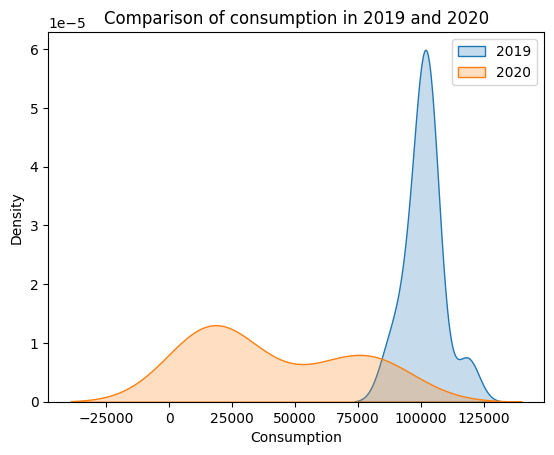

In [18]:
sns.kdeplot(usage_2019, label='2019', shade=True)
sns.kdeplot(usage_2020, label='2020', shade=True)
plt.title('Comparison of consumption in 2019 and 2020')
plt.xlabel('Consumption')
plt.ylabel('Density')
plt.legend()
plt.show()

Both the graphs states that the Maximum power is consumed during Feburary in 2019 and June in 2020

## **Power consumption during the Pre and Post Lockdown periods**

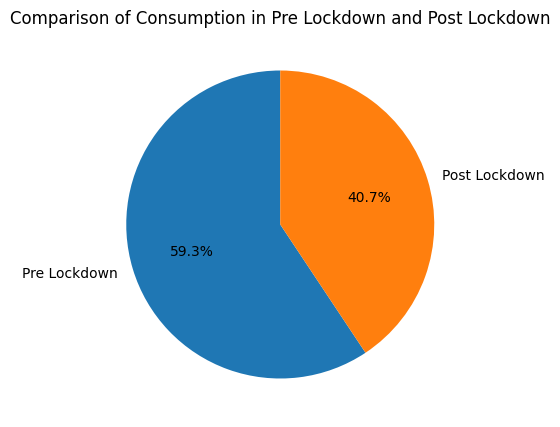

In [19]:
total_consumption_2019 = sum(usage_2019[2:5])
total_consumption_2020 = sum(usage_2020[2:5])
labels = ['Pre Lockdown', 'Post Lockdown']
sizes = [total_consumption_2019, total_consumption_2020]
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels = labels, startangle=90, autopct='%1.1f%%')
plt.title('Comparison of Consumption in Pre Lockdown and Post Lockdown')
plt.show()

The graph states that a large amount of power was consumed during the pre lockdown period and it was reduced in the post lockdown period.

## **TS Analysis**

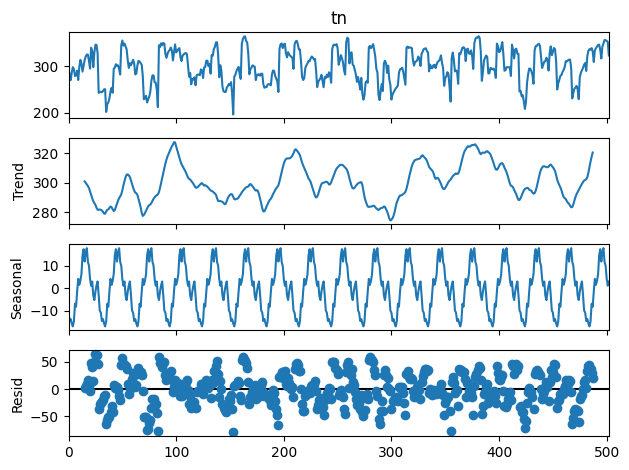

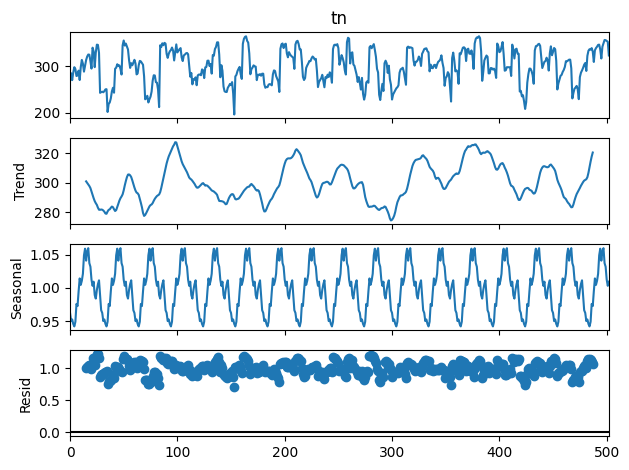

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
data["date"], data["tn"] = data[data.columns[0]], data["Tamil Nadu"]
seasonal_decompose(data["tn"], model='additive', period = 30).plot().show()
m = seasonal_decompose(data["tn"], model='multiplicative', period = 30)
m.plot().show()

<Axes: >

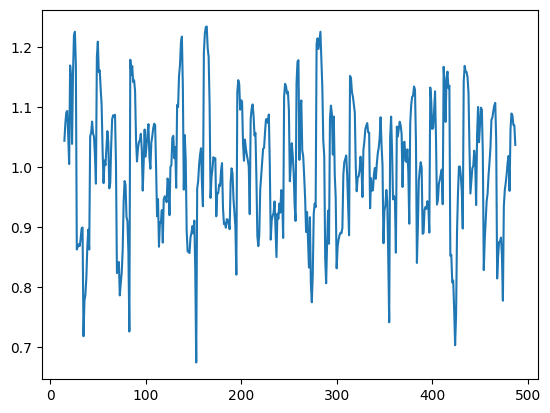

In [21]:
(data["tn"] / m.trend).plot()

<Axes: >

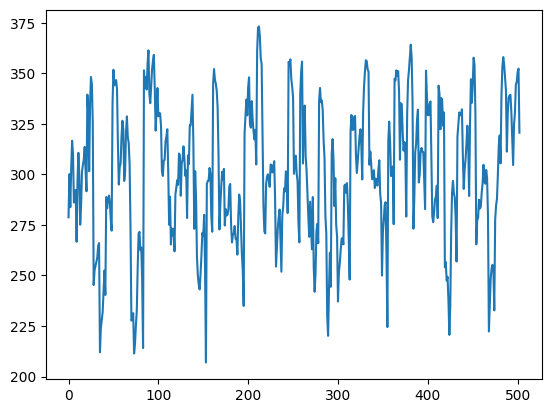

In [22]:
(data["tn"] / m.seasonal).plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

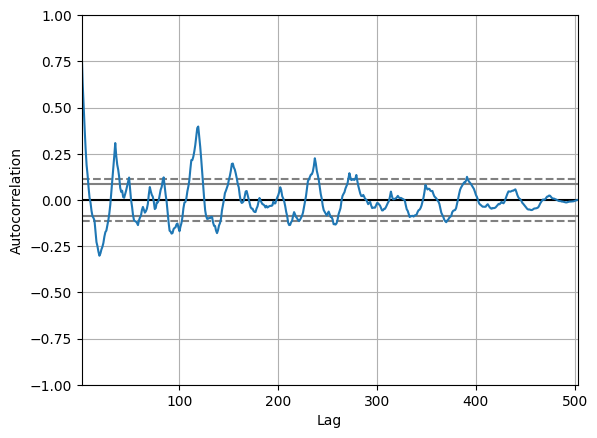

In [23]:
pd.plotting.autocorrelation_plot(data["tn"])

Figure(640x480)


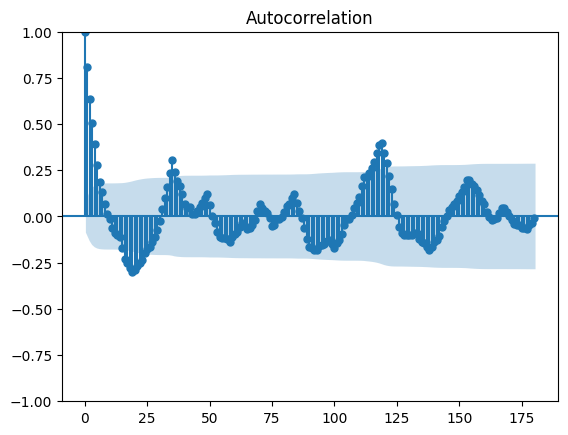

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print (plot_acf(data["tn"], lags = 180))

Figure(640x480)


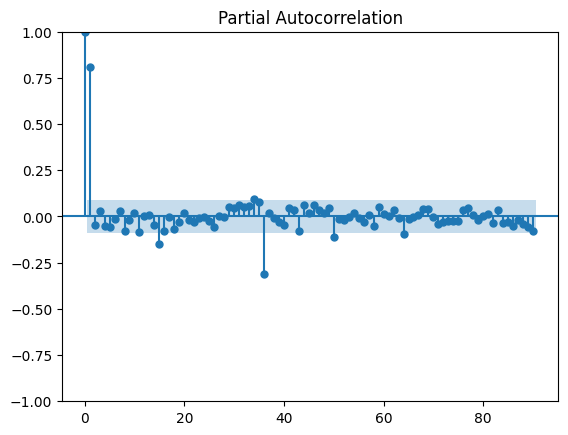

In [25]:
print (plot_pacf(data["tn"], lags = 90))

The graph visualizes the partial autocorrelation function (PACF) for a time series, specifically for the "tn"(Tamil Nadu) column in the provided DataFrame. The PACF shows the correlation between the time series and its own lagged values, with lags up to 90. Patterns in the graph can provide insights into the underlying temporal dependencies in the data.